In [4]:
! pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.1 MB/s eta 0:00:0000:0100:01


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
df = pd.read_csv('sp500_index.csv')
df.head()

,Date,S&P500
0,2012-10-22,1433.82
1,2012-10-23,1413.11
2,2012-10-24,1408.75
3,2012-10-25,1412.97
4,2012-10-26,1411.94


In [8]:
dates = df['Date']
df = df[['S&P500']]
df.head()

,S&P500
0,1433.82
1,1413.11
2,1408.75
3,1412.97
4,1411.94


In [9]:
df['Target'] = df['S&P500'].shift(-1)
df.head()

,S&P500,Target
0,1433.82,1413.11
1,1413.11,1408.75
2,1408.75,1412.97
3,1412.97,1411.94
4,1411.94,1412.16


In [14]:
def train_test(data, percent_test):
    data = data.values
    split = int(len(data) * (1-percent_test))
    train, test = data[:split], data[split :]
    return train, test

In [15]:
train, test = train_test(df, .2)

In [16]:
print(len(df))
print(len(train))
print(len(test))

2517
2013
504


In [18]:
X = train[:, : -1]
y = train[:, -1 :]

In [19]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [20]:
test[0]

array([3453.49, 3465.39])

In [22]:
val = np.array(test[0, 0]).reshape(1, -1)
pred = model.predict(val)
print(pred[0])

3427.4727


In [23]:
def xgb_predict(train, val):
    train = np.array(train)
    X = train[:, : -1]
    y = train[:, -1 :]
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(X, y)
    val = np.array(test[0, 0]).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

In [24]:
xgb_predict(train, test[0, 0])

3427.4727

In [27]:
from sklearn.metrics import mean_squared_error

def validate(data, percent):
    predictions = []
    
    train, test = train_test(data, percent)
    
    history = [x for x in train]
    
    for i in range(len(test)):
        test_X, test_y = test[i, : -1], test[i, -1:]
        pred = xgb_predict(history, test_X[0])
        predictions.append(pred)
        history.append(test[i])
    error = mean_squared_error(test[:, : -1], predictions, squared=False)
    return error, test[:, -1:], predictions

In [30]:
error, test, predictions = validate(df, .2)

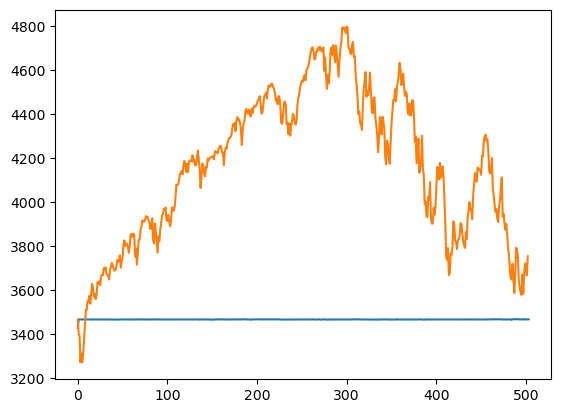

In [33]:
plt.plot(predictions)
plt.plot(test)

In [34]:
error

770.2362458653216